# Análise da dados

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/data.csv', encoding='latin1')  # Adjust the path as necessary

# Display the first few rows of the dataset and a summary of the data
print(df.head())  # Shows the first 5 rows of the dataframe
print(df.info())  # Provides information about the dataframe, such as the number of non-null entries and data types


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------

In [9]:
# Check for missing values in the dataset
print(df.isnull().sum())  # This will print the number of missing values per column

# Remove rows with missing 'CustomerID' values (if necessary)
df = df.dropna(subset=['CustomerID'])  # Removes rows where 'CustomerID' is NaN


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [4]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()  # This removes any repeated rows based on all columns

In [5]:
# Filter out rows with invalid quantities or unit prices (less than or equal to zero)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]  # Keeps only rows where Quantity and UnitPrice are greater than 0

In [6]:
# Convert the 'InvoiceDate' column to datetime format for proper date handling
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Converts InvoiceDate to pandas datetime format

In [8]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/content/data.csv', index=False)  # Saves the cleaned DataFrame without the index

In [10]:
# Generate descriptive statistics for numerical fields
print(df[['Quantity', 'UnitPrice']].describe())  # Provides count, mean, std, min, max, etc., for 'Quantity' and 'UnitPrice'

            Quantity      UnitPrice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


In [11]:
# Calculate the top 10 most sold products based on the total quantity sold
produtos_mais_vendidos = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print(produtos_mais_vendidos)  # Prints the top 10 most sold products by quantity

StockCode
23843     80995
23166     77916
84077     54319
22197     49160
85099B    46078
85123A    36763
84879     35263
21212     33670
23084     27153
22492     26076
Name: Quantity, dtype: int64


In [12]:
# Create a new column 'TotalValue' which is the total value for each transaction (Quantity * UnitPrice)
df['TotalValue'] = df['Quantity'] * df['UnitPrice']  # Multiplies Quantity and UnitPrice for each row to get the total value

# Identify the top 10 most valuable customers based on the total spending (TotalValue)
clientes_mais_valiosos = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(clientes_mais_valiosos)  # Prints the top 10 customers based on total spending

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalValue, dtype: float64


In [13]:
# Extract the year and month from 'InvoiceDate' and create a new column 'YearMonth' for monthly analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')  # Converts 'InvoiceDate' to a period object representing Year-Month

# Calculate the total sales value for each month
vendas_por_mes = df.groupby('YearMonth')['TotalValue'].sum()  # Groups the data by 'YearMonth' and sums up the 'TotalValue'
print(vendas_por_mes)  # Prints total sales per month

YearMonth
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517190.440
Freq: M, Name: TotalValue, dtype: float64


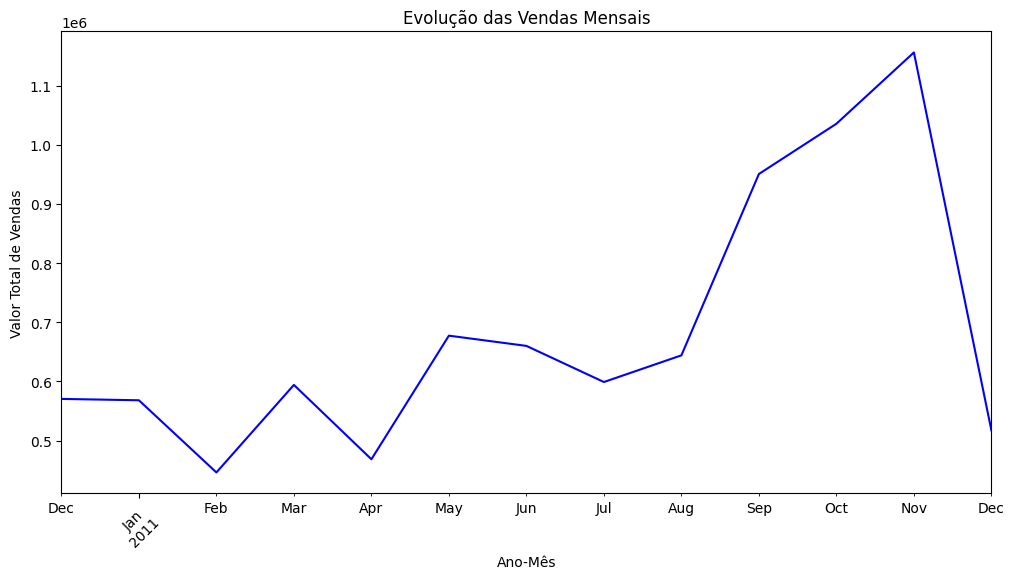

In [25]:
import matplotlib.pyplot as plt  # Imports the matplotlib package to create plots
import seaborn as sns  # Imports the seaborn package for data visualizations

# Line plot to visualize the sales evolution over time by month
plt.figure(figsize=(12, 6))  # Sets the figure size to 12x6 inches
vendas_por_mes.plot(kind='line', color='blue')  # Plots sales by month as a line chart, with blue color
plt.title('Evolução das Vendas Mensais')  # Sets the title of the chart (Sales Evolution Over Time)
plt.xlabel('Ano-Mês')  # Sets the label for the X-axis (Year-Month)
plt.ylabel('Valor Total de Vendas')  # Sets the label for the Y-axis (Total Sales Value)
plt.xticks(rotation=45)  # Rotates the X-axis labels by 45 degrees for better readability
plt.savefig('/content/vendas1.png', format='png')  # Saves the generated plot as a PNG image to the specified directory
plt.show()  # Displays the plot on the screen


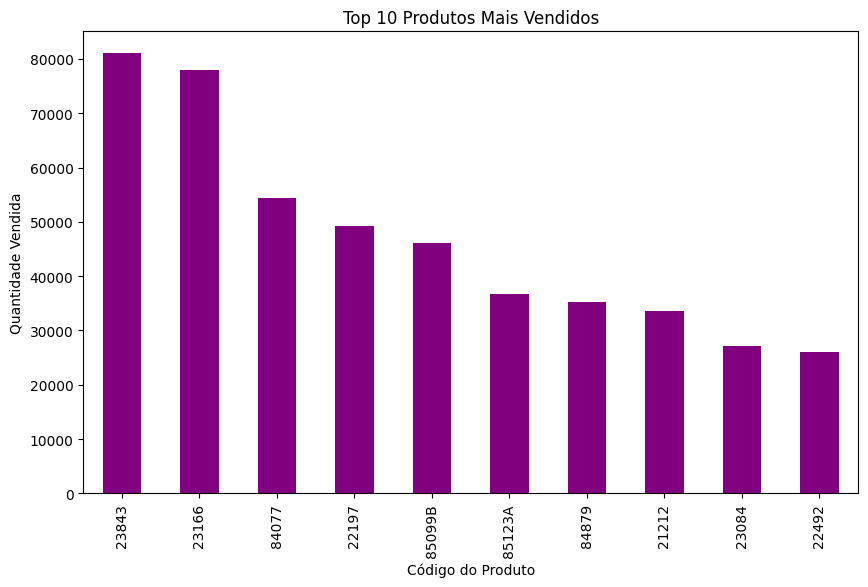

In [26]:
# Bar plot to visualize the top 10 best-selling products
plt.figure(figsize=(10, 6))  # Sets the figure size to 10x6 inches for better readability
produtos_mais_vendidos.plot(kind='bar', color='purple')  # Plots the top-selling products as a bar chart, with purple color
plt.title('Top 10 Produtos Mais Vendidos')  # Sets the title of the chart (Top 10 Best-Selling Products)
plt.xlabel('Código do Produto')  # Sets the label for the X-axis (Product Code)
plt.ylabel('Quantidade Vendida')  # Sets the label for the Y-axis (Quantity Sold)
plt.savefig('/content/vendas2.png', format='png')  # Saves the generated plot as a PNG image to the specified directory
plt.show()  # Displays the plot on the screen


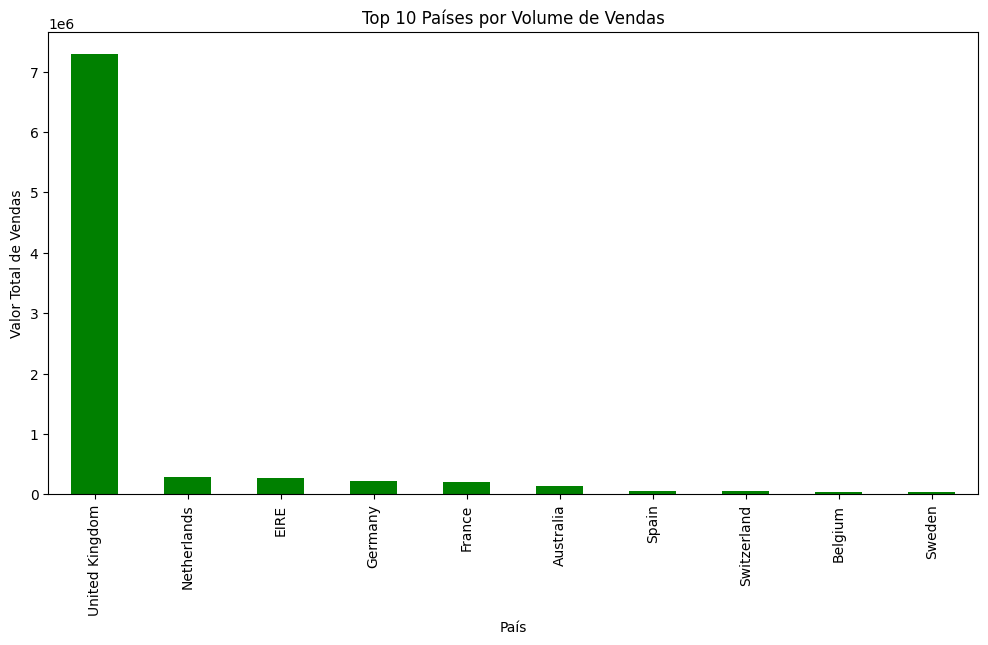

In [27]:
# Bar plot to visualize sales by country
vendas_por_pais = df.groupby('Country')['TotalValue'].sum().sort_values(ascending=False).head(10)
# Groups the data by country, sums the total sales per country, sorts the values in descending order, and selects the top 10 countries.

plt.figure(figsize=(12, 6))  # Defines the figure size (12x6 inches) for a better layout
vendas_por_pais.plot(kind='bar', color='green')  # Plots the sales by country as a bar chart, with green color
plt.title('Top 10 Países por Volume de Vendas')  # Sets the title of the chart (Top 10 Countries by Sales Volume)
plt.xlabel('País')  # Sets the label for the X-axis (Country)
plt.ylabel('Valor Total de Vendas')  # Sets the label for the Y-axis (Total Sales Value)
plt.savefig('/content/vendas3.png', format='png')  # Saves the generated plot as a PNG image to the specified directory
plt.show()  # Displays the plot on the screen


In [30]:
# Save the top-selling products report as a CSV file
produtos_mais_vendidos.to_csv('/content/top_produtos_vendidos.csv')
# Saves the 'produtos_mais_vendidos' (Top Selling Products) DataFrame to a CSV file in the specified path.

# Save the top valuable customers report as a CSV file
clientes_mais_valiosos.to_csv('/content/top_clientes_valiosos.csv')
# Saves the 'clientes_mais_valiosos' (Top Valuable Customers) DataFrame to a CSV file in the specified path.

# Save the monthly sales report as a CSV file
vendas_por_mes.to_csv('/content/vendas_mensais.csv')
# Saves the 'vendas_por_mes' (Monthly Sales) DataFrame to a CSV file in the specified path.


#Integração com o banco de dados Oracle

In [31]:
!pip install oracledb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.0 MB/s eta 0:00:00


In [ ]:
import oracledb  # Import the Oracle Database package for establishing the connection

# Connection data for the Oracle Database
username = 'your_username'  # Replace with your Oracle username
password = 'your_password'  # Replace with your Oracle password
dsn = 'your_dsn'  # Data Source Name, e.g., "host:port/service_name"

# Establish connection to the Oracle database
connection = oracledb.connect(user=username, password=password, dsn=dsn)
# Connects to the Oracle database using the provided credentials and DSN.

print("Connection successful!")
# Prints a message indicating that the connection was successful.


In [ ]:
# Create tables
with connection.cursor() as cursor:
    # Create the 'customers' table
    cursor.execute("""
        CREATE TABLE customers (
            CustomerID NUMBER PRIMARY KEY,  # Defines CustomerID as the primary key
            Country VARCHAR2(100)  # Defines a column for the country of the customer
        )
    """)

    # Create the 'sales' table
    cursor.execute("""
        CREATE TABLE sales (
            InvoiceNo VARCHAR2(20) PRIMARY KEY,  # Defines InvoiceNo as the primary key
            StockCode VARCHAR2(20),  # Defines a column for the stock code of the product
            Description VARCHAR2(255),  # Defines a column for the product description
            Quantity NUMBER,  # Defines a column for the quantity of products sold
            InvoiceDate DATE,  # Defines a column for the date of the sale
            UnitPrice NUMBER(10, 2),  # Defines a column for the unit price with 2 decimal places
            TotalValue NUMBER(10, 2),  # Defines a column for the total value of the sale (calculated)
            CustomerID NUMBER,  # Defines a column for the customer's ID
            FOREIGN KEY (CustomerID) REFERENCES customers(CustomerID)  # Defines a foreign key relationship with the 'customers' table
        )
    """)

print("Tables created successfully!")  # Prints a success message indicating the tables were created successfully


In [ ]:
# Load data from CSV into a DataFrame
data = pd.read_csv('your_file.csv')  # Replace with the correct file path

# Fill "TotalValue" column with the calculation of "Quantity" * "UnitPrice"
data['TotalValue'] = data['Quantity'] * data['UnitPrice']

# Organize the data for insertion into tables
customer_data = data[['CustomerID', 'Country']].drop_duplicates().values.tolist()  # Extract unique customer data
sales_data = data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'TotalValue', 'CustomerID']].values.tolist()  # Extract sales data

try:
    with connection.cursor() as cursor:
        # Insert customer data into the 'customers' table
        cursor.executemany("""
            INSERT INTO customers (CustomerID, Country)
            VALUES (:1, :2)
        """, customer_data)

        # Insert sales data into the 'sales' table
        cursor.executemany("""
            INSERT INTO sales (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, TotalValue, CustomerID)
            VALUES (:1, :2, :3, :4, TO_DATE(:5, 'YYYY-MM-DD HH24:MI:SS'), :6, :7, :8)
        """, sales_data)

    connection.commit()  # Commit the transaction
    print("Data inserted successfully!")  # Success message

except Exception as e:
    connection.rollback()  # Rollback in case of an error
    print("Error inserting data:", e)  # Error message


In [ ]:
# Close the database connection
connection.close()  # Closes the Oracle database connection

print("Connection closed.")  # Prints a message indicating that the connection has been closed

#Consultas SQL e Operações em SQL

In [ ]:
SELECT
    c.CustomerID,  -- Selects the CustomerID from the customers table
    c.Country,  -- Selects the Country from the customers table
    SUM(s.TotalValue) AS TotalFaturamento  -- Calculates the total value (TotalFaturamento) by summing the TotalValue from sales
FROM
    customers c  -- From the customers table (aliased as 'c')
JOIN
    sales s ON c.CustomerID = s.CustomerID  -- Joins the sales table (aliased as 's') with customers on the CustomerID field
GROUP BY
    c.CustomerID, c.Country  -- Groups the results by CustomerID and Country to calculate the sum per customer
ORDER BY
    TotalFaturamento DESC  -- Orders the results by TotalFaturamento in descending order, showing the highest total first
FETCH FIRST 5 ROWS ONLY;  -- Limits the result to the top 5 rows with the highest TotalFaturamento


In [ ]:
CREATE INDEX idx_sales_customer_id ON sales(CustomerID);


In [ ]:
SELECT
    s1.StockCode,
    p.Description,
    (SUM(CASE WHEN EXTRACT(MONTH FROM s1.InvoiceDate) IN (7, 8, 9) THEN s1.Quantity ELSE 0 END) -
     SUM(CASE WHEN EXTRACT(MONTH FROM s1.InvoiceDate) IN (4, 5, 6) THEN s1.Quantity ELSE 0 END)) AS IncrementoVendas
FROM
    sales s1
JOIN
    (SELECT StockCode, Description FROM sales GROUP BY StockCode, Description) p ON s1.StockCode = p.StockCode
GROUP BY
    s1.StockCode, p.Description
ORDER BY
    IncrementoVendas DESC
FETCH FIRST 1 ROW ONLY;


In [ ]:
CREATE INDEX idx_sales_invoicedate ON sales(InvoiceDate);
CREATE INDEX idx_sales_stockcode ON sales(StockCode);


In [ ]:
SELECT
    c.Country,
    SUM(s.Quantity * s.UnitPrice) AS PotencialExpansao
FROM
    customers c
JOIN
    sales s ON c.CustomerID = s.CustomerID
GROUP BY
    c.Country
ORDER BY
    PotencialExpansao DESC
FETCH FIRST 1 ROW ONLY;


In [ ]:
CREATE INDEX idx_customers_country ON customers(Country);


#Desenvolvimento de Rotinas em PL/SQL

In [ ]:
CREATE OR REPLACE PROCEDURE AtualizarEstoque AS
BEGIN
    FOR v IN (SELECT InvoiceNo, StockCode, Quantity FROM sales WHERE Processed = 'N') LOOP
        -- Subtrair a quantidade vendida do estoque
        UPDATE stock
        SET QuantityInStock = QuantityInStock - v.Quantity
        WHERE StockCode = v.StockCode;

        -- Marcar a venda como processada
        UPDATE sales
        SET Processed = 'Y'
        WHERE InvoiceNo = v.InvoiceNo;
    END LOOP;

    COMMIT;
END AtualizarEstoque;


In [ ]:
CREATE OR REPLACE PROCEDURE GerarRelatorioMensal AS
BEGIN
    FOR v IN (
        SELECT TO_CHAR(InvoiceDate, 'YYYY-MM') AS Mes,
               SUM(Quantity * UnitPrice) AS TotalVendas
        FROM sales
        GROUP BY TO_CHAR(InvoiceDate, 'YYYY-MM')
        ORDER BY Mes
    ) LOOP
        -- Aqui, você pode inserir o resultado em uma tabela de relatórios ou gerar o relatório
        INSERT INTO monthly_sales_report (Month, TotalSales)
        VALUES (v.Mes, v.TotalVendas);
    END LOOP;

    COMMIT;
END GerarRelatorioMensal;


In [ ]:
CREATE OR REPLACE FUNCTION TempoMedioEntreCompras (p_CustomerID IN NUMBER)
RETURN NUMBER IS
    v_total_dias NUMBER := 0;
    v_num_compras NUMBER := 0;
    v_data_anterior DATE;
    v_data_atual DATE;
BEGIN
    FOR v IN (
        SELECT InvoiceDate
        FROM sales
        WHERE CustomerID = p_CustomerID
        ORDER BY InvoiceDate
    ) LOOP
        IF v_num_compras > 0 THEN
            v_data_atual := v.InvoiceDate;
            v_total_dias := v_total_dias + (v_data_atual - v_data_anterior);
        END IF;
        v_data_anterior := v.InvoiceDate;
        v_num_compras := v_num_compras + 1;
    END LOOP;

    IF v_num_compras > 1 THEN
        RETURN v_total_dias / (v_num_compras - 1);
    ELSE
        RETURN 0;  -- Caso o cliente tenha feito apenas uma compra
    END IF;
END TempoMedioEntreCompras;


In [ ]:
CREATE OR REPLACE TRIGGER AuditoriaClientes
AFTER INSERT OR UPDATE OR DELETE ON customers
FOR EACH ROW
DECLARE
    v_operacao VARCHAR2(10);
BEGIN
    IF INSERTING THEN
        v_operacao := 'INSERT';
    ELSIF UPDATING THEN
        v_operacao := 'UPDATE';
    ELSIF DELETING THEN
        v_operacao := 'DELETE';
    END IF;

    -- Inserir registro na tabela de auditoria
    INSERT INTO clientes_auditoria (CustomerID, Operacao, DataAlteracao)
    VALUES (:NEW.CustomerID, v_operacao, SYSDATE);

    COMMIT;
END AuditoriaClientes;
